In [28]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

In [ ]:
link = "http://bit.ly/w-data"
df = pd.read_csv(link)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


We will plot the data to see the kind of relation between the variables.

In [ ]:
fig = px.scatter(df ,x='Hours', y='Scores', title='Hours vs Score Percentage')
fig.show()

From the graph above we can see there are positive linear relation between the two variables. 

# **ML phase**

In [ ]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.33, random_state=42) 

In [ ]:
# Create linear regression object
reg = LinearRegression()
# train the model
reg.fit(X_train, y_train) 

LinearRegression()

Coefficients: 
 [9.65029083]
Mean squared error: 24.07
Mean absolute error: 4.56
Coefficient of determination: 0.94


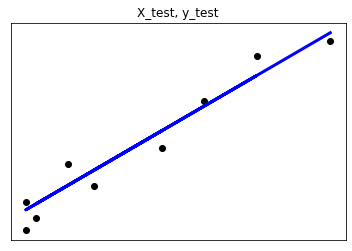

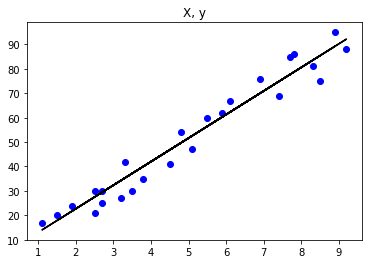

In [32]:
# Make predictions using the testing set
y_pred = reg.predict(X_test)
# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % MSE(y_test, y_pred))
# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs for the test data and the splitted X , y
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.title('X_test, y_test')

plt.show()

plt.scatter(X, y,color='b')
plt.plot(X, reg.predict(X),color='k')

plt.title('X, y')
plt.show()

Comparing Actual vs Predicted

In [27]:
act_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
act_pred

,Actual,Predicted
0,81,83.502444
1,30,27.530757
2,21,27.530757
3,76,69.992037
4,62,60.341746
5,25,29.460815
6,42,35.250990
7,47,52.621513
8,35,40.076135


What will be predicted score if a student studies for 9.25 hours/day?

In [40]:
hours = 9.25
hours_reshape = np.array(hours).reshape(-1, 1)
own_pred = reg.predict(hours_reshape)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred))

No of Hours = 9.25
Predicted Score = [92.67022038]
